In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# loading bostan housing dataset from openml
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None


In [4]:
#checking for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
print(df.describe())

             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT        MEDV  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063   22.532806  
std      2.105710  168.537116 

Visualizing the target variable

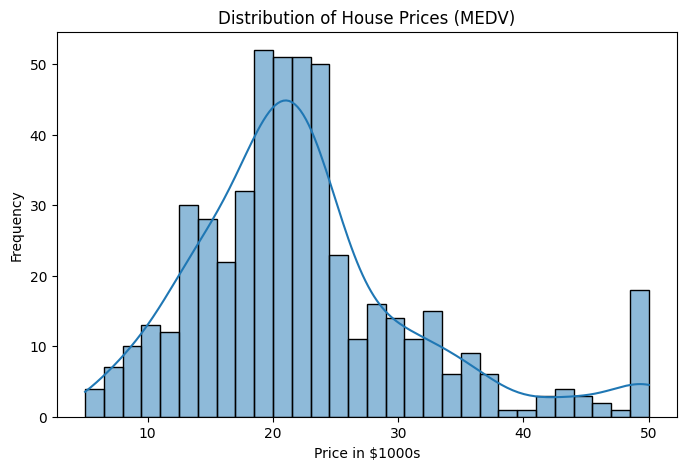

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Price in $1000s')
plt.ylabel('Frequency')
plt.show()

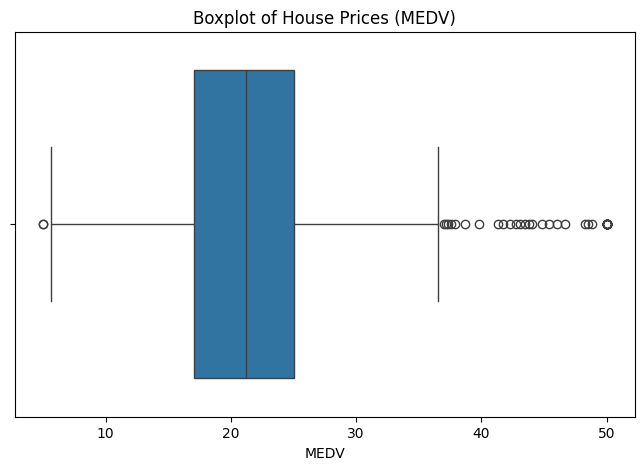

In [7]:
# checking the outliers in MEDV
# Boxplot to visualize outliers in MEDV
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MEDV'])
plt.title("Boxplot of House Prices (MEDV)")
plt.show()

As there are outliers, so we will cap them

Handling outliers

In [8]:
#Calculating IQR Interquartile Range
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1

In [9]:
#defining outliers bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
df['MEDV'] = np.clip(df['MEDV'], lower_bound, upper_bound)

In [11]:
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 5.0624999999999964, Upper Bound: 36.962500000000006


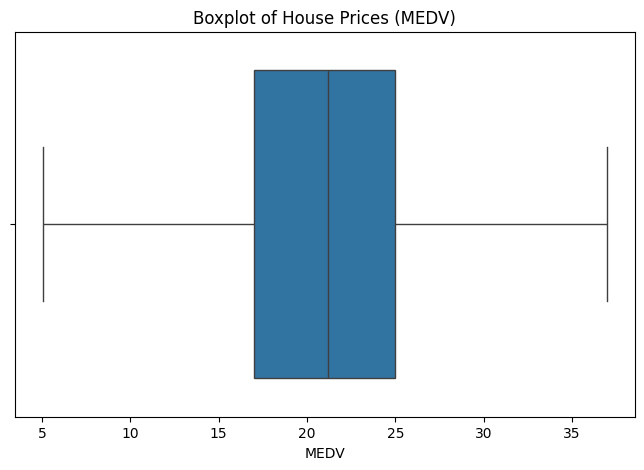

In [12]:
# checking again boxplot after capping
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MEDV'])
plt.title("Boxplot of House Prices (MEDV)")
plt.show()

Spliting data in features and targets

In [13]:
X = pd.get_dummies(df.drop(columns=["MEDV"]), drop_first=True)
X = X.astype(int)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1. Implementing Linear regression from the scratch**

In [15]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of iterations
        self.weights = None  # Weights for features
        self.bias = None

    def fit(self, X, y):
      X = np.array(X)  # Converting DataFrame to NumPy array
      y = np.array(y)

      n_samples, n_features = X.shape
      self.weights = np.zeros(n_features)
      self.bias = 0

      for epoch in range(self.epochs):
          y_pred = np.dot(X, self.weights) + self.bias
          error = y_pred - y

          # Computing gradients
          dw = (1/n_samples) * np.dot(X.T, error)
          db = (1/n_samples) * np.sum(error)

          # Updating weights
          self.weights -= self.lr * dw
          self.bias -= self.lr * db


          if epoch % 100 == 0:
              loss = np.mean(error ** 2)
              print(f"Epoch {epoch}, Loss: {loss}")


    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [16]:
print(type(X_train))  # Should be <class 'numpy.ndarray'> or <class 'pandas.DataFrame'>
print(X_train.dtypes)  # Check for non-numeric columns


<class 'pandas.core.frame.DataFrame'>
CRIM       int64
ZN         int64
INDUS      int64
NOX        int64
RM         int64
AGE        int64
DIS        int64
TAX        int64
PTRATIO    int64
B          int64
LSTAT      int64
CHAS_1     int64
RAD_2      int64
RAD_24     int64
RAD_3      int64
RAD_4      int64
RAD_5      int64
RAD_6      int64
RAD_7      int64
RAD_8      int64
dtype: object


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
model = LinearRegressionScratch(lr=0.01, epochs=1000)
model.fit(X_train, y_train)


Epoch 0, Loss: 548.7655205754951
Epoch 100, Loss: 81.87423111039654
Epoch 200, Loss: 23.256871440937726
Epoch 300, Loss: 15.0383572990212
Epoch 400, Loss: 13.71941612784203
Epoch 500, Loss: 13.409729711553965
Epoch 600, Loss: 13.282066592886125
Epoch 700, Loss: 13.206079759921094
Epoch 800, Loss: 13.153655679625363
Epoch 900, Loss: 13.114912533951417


In [19]:
#predicting
y_pred = model.predict(X_test)

In [20]:
print(y_pred)

[26.67797308 30.77164081 14.71973312 24.80418789 18.22086707 21.53868483
 17.06089443 14.41699733 20.14273032 20.15848425 20.8526044  19.28721657
 -1.87197315 20.58151968 19.8482882  21.80700968 17.60999343  7.04972982
 34.70974028 17.30603211 29.91162446 27.3308478  11.73576622 23.00331644
 19.29055693 14.95827439 21.45964388 13.4389928  18.77823868 18.26966158
 21.92096187 24.45912066 22.02612967 19.92028513 15.59826401 20.15709402
 30.01927671 20.29829977 21.94986172 23.63260722 14.53015199 29.78274137
 37.170373   18.34826229 26.95966888 16.996864   14.74945983 24.22230148
 18.14387389 28.73768006 21.5583265  29.50990831 17.25484089 25.01675798
 35.04844169 21.92147682 18.68979504 28.99599151 27.16826555 16.55621133
 23.74589033 29.84753951 31.06683393 18.89559666 22.51844178 15.49068398
 18.81290647 25.33158118 32.0723811  11.48999999 22.26144027 22.96167135
 11.72769019 19.38622769 22.71837571  7.11323112 22.00073094 34.57567241
 16.07901246 11.60967549 21.04748012 11.33416856 21

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

Mean Squared Error: 13.764359933021167
R²: 0.7186637916316126


**Mean Squared Error:** 13.764359933021167,
*R²*: 0.7186637916316126

---

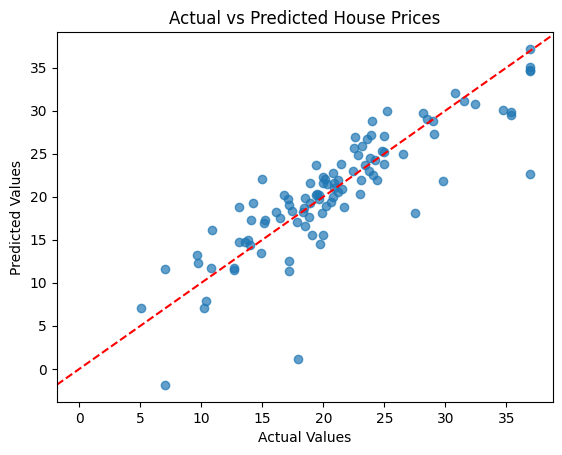

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")
plt.show()

**2. Random Forest from scratch**

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
# normalizing features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [25]:
# spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# MSE & R2 Functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    return 1 - (mse(y_true, y_pred) / np.var(y_true))

In [61]:
# Decision Tree Regressor class from Scratch
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)

        best_split = self._find_best_split(X, y)
        if not best_split:
            return np.mean(y)

        left_idx = X[:, best_split['feature']] < best_split['threshold']
        right_idx = ~left_idx

        left_subtree = self._grow_tree(X[left_idx], y[left_idx], depth+1)
        right_subtree = self._grow_tree(X[right_idx], y[right_idx], depth+1)

        return {'feature': best_split['feature'], 'threshold': best_split['threshold'], 'left': left_subtree, 'right': right_subtree}

    def _find_best_split(self, X, y):
        best_split = {}
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_idx = X[:, feature] < threshold
                right_idx = ~left_idx
                if np.sum(left_idx) == 0 or np.sum(right_idx) == 0:
                    continue

                left_mse = mse(y[left_idx], np.mean(y[left_idx]))
                right_mse = mse(y[right_idx], np.mean(y[right_idx]))
                total_mse = (left_mse * np.sum(left_idx) + right_mse * np.sum(right_idx)) / len(y)

                if total_mse < best_mse:
                    best_mse = total_mse
                    best_split = {'feature': feature, 'threshold': threshold}

        return best_split if best_split else None

    def predict(self, X):
        X = X.to_numpy()
        return np.array([self._predict_single(x, self.tree) for x in X])

    def _predict_single(self, x, node):
        if isinstance(node, dict):
            if x[node['feature']] < node['threshold']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])
        return node

    def _calculate_feature_importance(self, X, y):

        feature_importances = np.zeros(X.shape[1])

        def _recursive_importance(node, samples):
            if isinstance(node, dict):
                feature = node['feature']
                threshold = node['threshold']

                left_idx = X[samples, feature] < threshold
                right_idx = ~left_idx

                left_samples = samples[left_idx]
                right_samples = samples[right_idx]

                # calculating MSE reduction for this split
                mse_reduction = mse(y[samples], np.mean(y[samples])) - \
                                (mse(y[left_samples], np.mean(y[left_samples])) * len(left_samples) +
                                 mse(y[right_samples], np.mean(y[right_samples])) * len(right_samples)) / len(samples)

                feature_importances[feature] += mse_reduction

                _recursive_importance(node['left'], left_samples)
                _recursive_importance(node['right'], right_samples)

        _recursive_importance(self.tree, np.arange(X.shape[0]))
        return feature_importances

In [62]:
# Random Forest Regressor  class from Scratch
class RandomForestRegressorScratch:
    def __init__(self, n_trees=10, max_depth=5, min_samples_split=2, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.sample_size = sample_size
        self.trees = []
        self.feature_importances_ = None

    def fit(self, X, y):
        self.trees = []
        n_samples = int(self.sample_size * len(y))
        for _ in range(self.n_trees):
            idxs = np.random.choice(len(y), n_samples, replace=True)
            tree = DecisionTreeRegressorScratch(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X[idxs], y[idxs])
            self.trees.append(tree)


       # Calculating feature importances after fitting all trees
        self.feature_importances_ = self._calculate_feature_importances(X, y)

    def _calculate_feature_importances(self, X, y):

        all_importances = [tree._calculate_feature_importance(X, y) for tree in self.trees]
        return np.mean(all_importances, axis=0)


    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)


In [64]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [65]:
# training Random Forest
rf_scratch = RandomForestRegressorScratch(n_trees=10, max_depth=5)
# converting X_train and y_train to NumPy arrays before fitting
rf_scratch.fit(X_train.to_numpy(), y_train.to_numpy())


In [66]:

y_pred_rf = rf_scratch.predict(X_test)


In [67]:

mse_rf = mse(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [68]:
print(f"Random Forest - MSE: {mse_rf:.4f}")
print(f"Random Forest - R²: {r2_rf:.4f}")

Random Forest - MSE: 9.4267
Random Forest - R²: 0.8073


**Random Forest:-**  MSE: 9.4267, R²: 0.8073


---

**3. Implementing  XGBoost from scratch**

In [34]:
import numpy as np

class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left_value = None
        self.right_value = None

    def fit(self, X, y):
        """Find the best split for a single feature."""
        best_mse = float('inf')

     # Converting X to NumPy array if it's a DataFrame
        X = X.to_numpy() if isinstance(X, pd.DataFrame) else X

        for feature in range(X.shape[1]):
            values = np.unique(X[:, feature])
            for threshold in values:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_mean = np.mean(y[left_mask])
                right_mean = np.mean(y[right_mask])

                mse = np.mean((y[left_mask] - left_mean) ** 2) + np.mean((y[right_mask] - right_mean) ** 2)

                if mse < best_mse:
                    best_mse = mse
                    self.feature_index = feature
                    self.threshold = threshold
                    self.left_value = left_mean
                    self.right_value = right_mean

    def predict(self, X):
        X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        predictions = np.where(X[:, self.feature_index] <= self.threshold, self.left_value, self.right_value)
        return predictions


In [35]:
class XGBoostScratch:
    def __init__(self, n_estimators=50, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        """Train the XGBoost model using gradient boosting."""
        predictions = np.zeros(y.shape)  #starting with zero predictions

        for _ in range(self.n_estimators):
            residuals = y - predictions  #computing residuals (gradients)
            tree = DecisionStump()
            tree.fit(X, residuals)
            self.trees.append(tree)

            predictions += self.learning_rate * tree.predict(X)

    def predict(self, X):
        predictions = np.zeros((X.shape[0],))
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

#training XGBoost
xgb_scratch = XGBoostScratch(n_estimators=50, learning_rate=0.1)
xgb_scratch.fit(X_train, y_train)


In [37]:
# Predicting
y_pred_xgb = xgb_scratch.predict(X_test)

In [38]:

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [39]:
print(f"XGBoost  - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")

XGBoost  - MSE: 43.7165, R²: 0.1065


**XGBoost:-** ***MSE: 73.4585, R²: -0.0017***

---

**Feature Importance**

For Random Forest

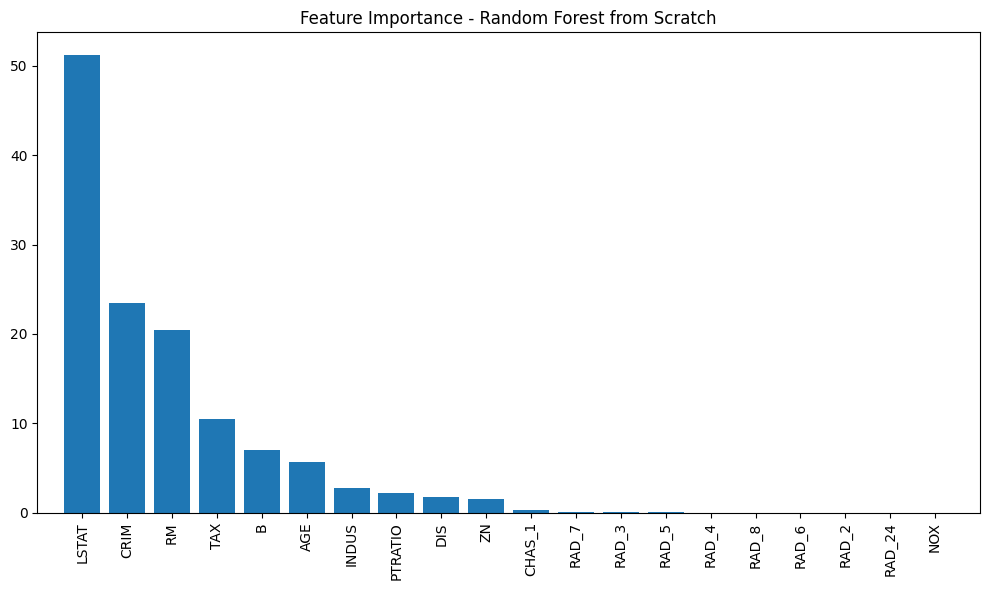

In [71]:
import matplotlib.pyplot as plt
import numpy as np

#geting features from trained model
feature_importances = rf_scratch.feature_importances_

# geting the indices of the features sorted by importance
indices = np.argsort(feature_importances)[::-1]

feature_names = X_train.columns

# need to adjust the indices to be within the range of feature_names
num_features = min(len(feature_importances), len(feature_names))
indices = indices[:num_features]

# ploting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest from Scratch")
plt.bar(range(num_features), feature_importances[indices], align="center")
plt.xticks(range(num_features), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, num_features])
plt.tight_layout()
plt.show()